In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def readFile(filename):
    data = pd.read_csv(filename)
    return data

data1=readFile('./DataLR.csv')

In [24]:
d=data1.values

In [25]:
x=np.array(d[:,0])
y=np.array(d[:,1])

In [26]:
#normalization
x = (x- x.mean())/x.std()

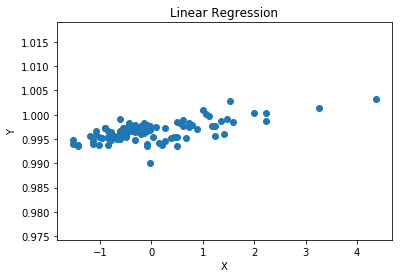

In [27]:
plt.scatter(x,y)
plt.title("Linear Regression")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [35]:
def hypothesis(x1,theta):
    return theta[0] + theta[1]*x1

def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.array([0.0,0.0])
    for i in range(m):
        grad[0] +=  (Y[i] - hypothesis(X[i],theta))
        grad[1] +=  (Y[i] - hypothesis(X[i],theta))*X[i]
    
    return grad        

def error(X,Y,theta):
    total_error = 0
    m = X.shape[0]
    
    for i in range(m):
        total_error += (Y[i] - hypothesis(X[i],theta))**2
    
    return 0.5*total_error

def linearRegression(X,Y,learning_rate,maxIter):
    theta = np.array([0.0,0.0])
    a=learning_rate
    e=[]
    thetaMatrix=[]
    for _ in range(maxIter):   
        grad=gradient(X,Y,theta)
        ce=error(X,Y,theta)
        #print(ce)
        theta[0]=theta[0] + a*grad[0]
        theta[1]=theta[1] + a*grad[1]
        thetaMatrix.append([theta[0],theta[1]])
        e.append(ce)
    return theta,e,thetaMatrix


theta,e,thetaMatrix=linearRegression(x,y,0.003,100)

#print(theta[0])

print(hypothesis(x,theta))

[0.99659367 0.99745779 0.9969079  0.99572956 0.99635801 1.00256392
 0.99604378 0.99580811 0.99596523 0.99824335 0.99934313 0.99588667
 0.99816479 0.99730068 0.99651512 0.99470833 0.99525822 0.99557245
 0.99847902 0.99698645 0.99612234 0.99525822 0.99455122 0.99730068
 0.99769346 0.99620089 0.99965735 0.99643656 0.99612234 0.99879324
 0.9983219  0.99517967 0.99635801 1.00107136 0.99659367 0.99557245
 0.99557245 0.99580811 0.99682934 0.99612234 0.99808624 0.99510111
 0.99580811 0.99455122 0.99871468 0.99627945 0.99730068 0.99753634
 0.99549389 0.99596523 0.99659367 0.99643656 0.99651512 0.99580811
 0.99580811 0.99627945 0.99745779 0.99737923 0.99651512 0.99549389
 0.99965735 0.99541533 0.99588667 0.99722212 0.99620089 0.99635801
 0.99502255 0.99863613 0.99549389 0.99675079 0.99651512 0.99588667
 0.99470833 0.99533678 0.99620089 0.99800768 0.99580811 0.99855757
 0.99588667 0.99517967 0.99541533 0.99635801 0.99596523 0.9976149
 0.99698645 0.99635801 0.995651   0.99643656 0.99714356 0.99785

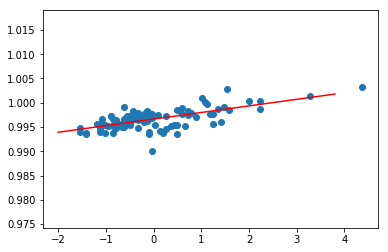

In [36]:
testX=np.arange(-2,4,0.2)
plt.scatter(x,y)
plt.plot(testX,hypothesis(testX,theta),color='r')

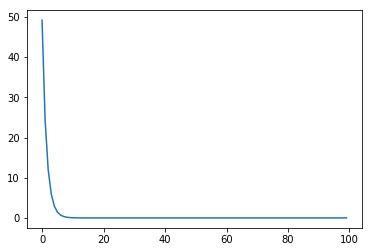

In [37]:
plt.plot(e)

In [38]:
from mpl_toolkits.mplot3d import Axes3D

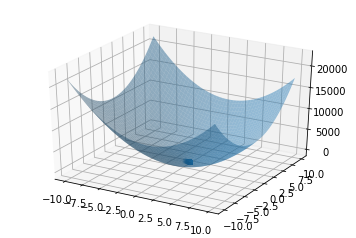

In [39]:
thetaMatrix=np.array(thetaMatrix)
t0=np.arange(-10,10,0.1)
t1=t0

t0,t1=np.meshgrid(t0,t1)

m=t0.shape[0]  # no. of rows
n=t0.shape[1]  # no. of cols

err=np.zeros((m,n))

for i in range(m):
    for j in range(n):
        err[i,j]= np.sum((y- t0[i,j] - t1[i,j]*x)**2)

        
fig = plt.figure()
axes=fig.gca(projection='3d')
axes.scatter(thetaMatrix[:,0],thetaMatrix[:,1],e)   # how gradient descent moved to optimal theta
axes.plot_surface(t0,t1,err,alpha=0.45)
plt.show()

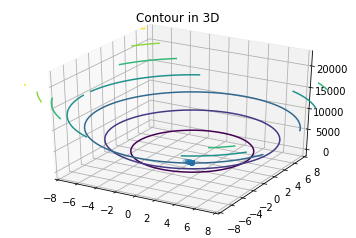

In [40]:
fig = plt.figure()
axes=fig.gca(projection='3d')
axes.scatter(thetaMatrix[:,0],thetaMatrix[:,1],e)  # how gradient descent moved to optimal theta
axes.contour(t0,t1,err)
axes.set_xlim([-8,8])
axes.set_ylim([-8,8])
plt.title("Contour in 3D")
plt.show()  

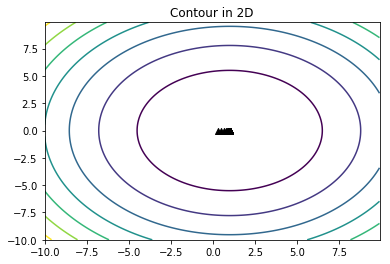

In [41]:
plt.contour(t0,t1,err)
plt.scatter(thetaMatrix[:,0],thetaMatrix[:,1],c='black',marker='^')
plt.title("Contour in 2D")
plt.show()